# Project 4: PCA - Lucy Buhayenko

# Part 1

## Compute the coordinates of Cheese and Fresh fruits for the first two components.
#### Cheese1 = (0.1 * 105) + (0.1 * 103) + (0.1 * 103) + (0.1 * 66)  = 37.7
#### Cheese2 = (0.2 * 105) + (0.2 * 103) + (0.2 * 103) + (0.2 * 66)  = 75.4

#### Freshfruits1 = (1102 * 0.5) + (1137 * 0.5) + (957 * 0.5) + (674 * 0.5) = 1,935
#### Freshfruits2 = (1102 * 0.3) + (1137 * 0.3) + (957 * 0.3) + (674 * 0.3) = 1,161

#### Coordinate of Cheese for first component: 37.7
#### Coordinate of Cheese for second component: 75.4
#### Coordinate of Fresh Fruits for first component: 1935
#### Coordinate of Fresh Fruits for second component: 1161

## Compute the norms for each features and rank their importance related to the variance
#### Cheese: sqrt(64.1squared + 30.5squared) = 71
#### Fish: sqrt(78squared + 48.9squared) = 92.1
#### Sugar: sqrt(108.9squared + 61squared) = 124.8
#### Freshfruits: sqrt(602.6squared + 344.9squared) = 649.3

## Ranking features by importance:
### 1. Freshfruits
### 2. Sugar
### 3. Fish
### 4. Cheese


# Part 2

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn import decomposition
from sklearn.decomposition import PCA
import plotly.express as px




## Student Lifestyle Dataset

In [2]:
df = pd.read_csv('student_lifestyle_dataset.csv')
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


## Looking at columns

In [3]:
df.columns

Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')

## Dropping Student ID because it not useful, and dropping non-numeric target variable

In [4]:
df = df.drop(columns=['Student_ID', 'Stress_Level'])

## Checking if the dataset is clean: There are no missing values so there is no need for me to delete / replace any value

In [5]:
df.isnull().sum()

Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
dtype: int64

## I define X and y

In [6]:
y = df['GPA']
X = df.drop(columns=['GPA'])


## Correlation: 
### GPA and Study_Hours_Per_Day are highly positively correlated(0.73), so i delete Study_Hours_Per_Day

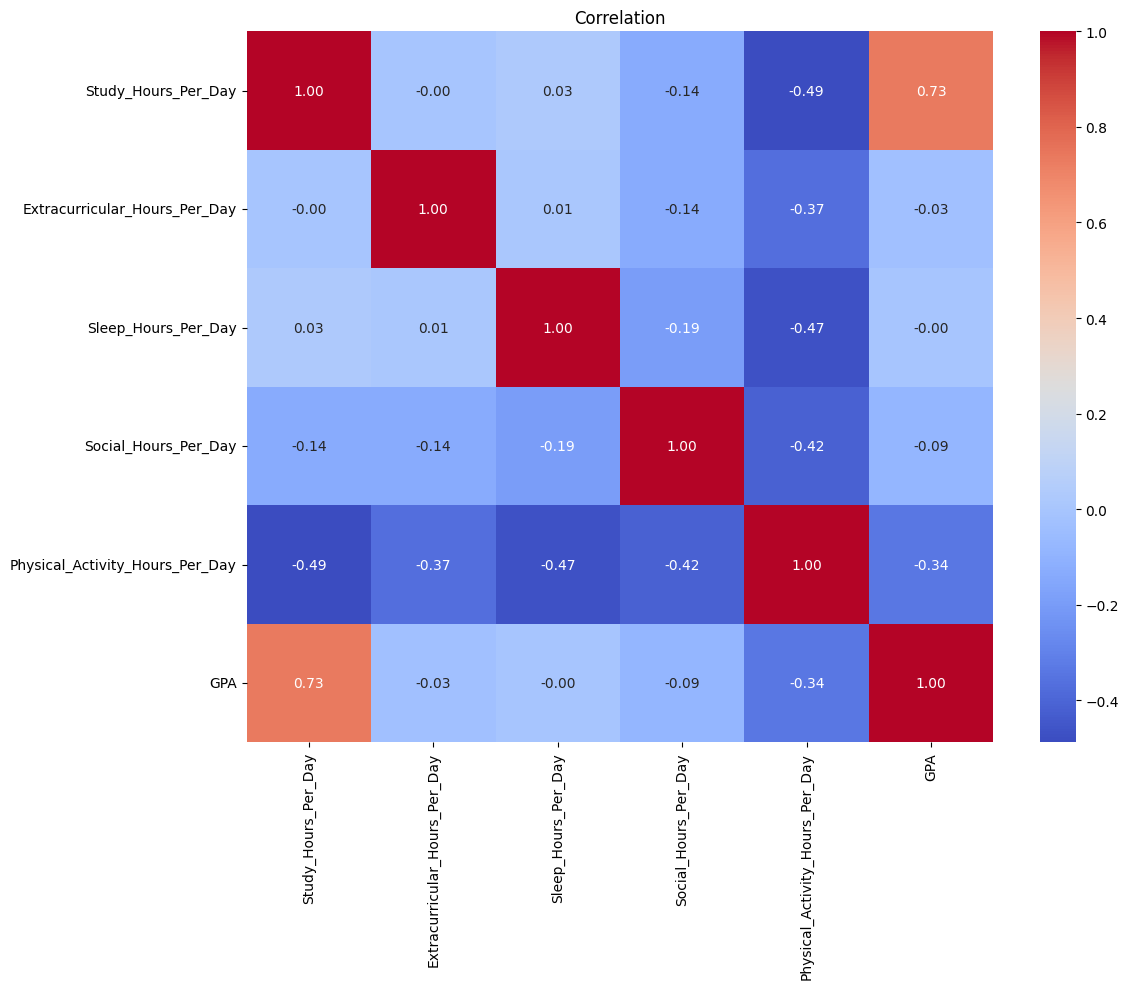

In [7]:
# Plot correlation
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation")
plt.tight_layout()
plt.show()

In [8]:
# drop the Study_Hours_Per_Day
df = df.drop(columns=['Study_Hours_Per_Day'])
#redefining the features
X = df.drop(columns=['GPA'])

## Scaler:
### I scale the data

In [9]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## PCA with 2 components

In [10]:
# PCA with 2 components
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)
explained_variance = pca2.explained_variance_ratio_
components = pca2.components_

## Plotting features in terms of PCA1 and PCA2
### Here is a scatter plot of the first two principal components (PCA1 and PCA2) after reducing the dataset's dimensions using PCA. Each point represents a student and is colored based on their GPA, (low GPA = red, high GPA = green).


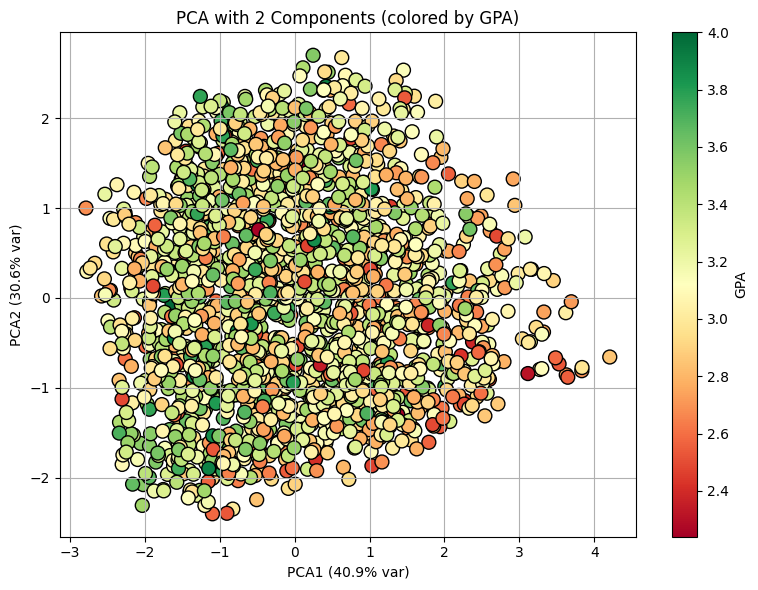

In [11]:
plt.figure(figsize=(8,6))
sc = plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, cmap='RdYlGn', s=100, edgecolor='k')
plt.title("PCA with 2 Components (colored by GPA)")
plt.xlabel(f'PCA1 ({explained_variance[0]*100:.1f}% var)')
plt.ylabel(f'PCA2 ({explained_variance[1]*100:.1f}% var)')
plt.colorbar(sc, label='GPA')
plt.grid(True)
plt.tight_layout()
plt.show()

## Plotting the importance of the features related to PCA1 and PCA2
### Here I visualize how each original feature contributes to PCA1 and PCA2 by plotting their weights (loadings) from the PCA components matrix. Each point on the scatter plot represents a feature, positioned according to its weight in PCA1 (x-axis) and PCA2 (y-axis), showing its relative importance and direction in these components. The plot includes reference lines at zero, axis labels, a legend, and grid for clarity, helping interpret which features drive the principal components.


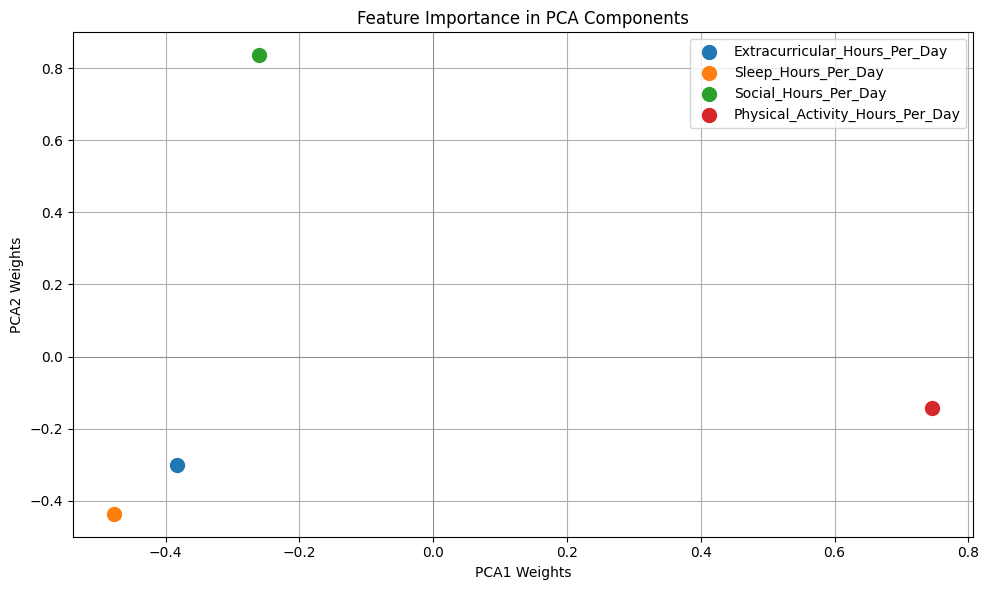

In [12]:
weights = pca2.components_  # shape (2, number_of_features)
feature_names = X.columns

plt.figure(figsize=(10,6))
for i, feature in enumerate(feature_names):
    plt.scatter(weights[0, i], weights[1, i], label=feature, s=100)

plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.xlabel('PCA1 Weights')
plt.ylabel('PCA2 Weights')
plt.title('Feature Importance in PCA Components')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


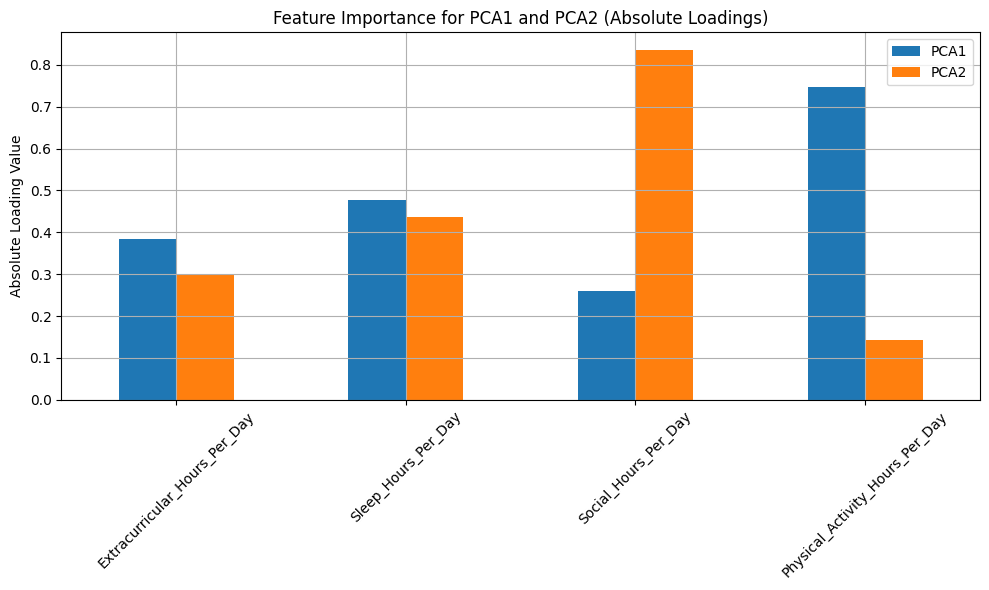

In [16]:
# --- (c) Plot the importance of features related to PCA1 and PCA2 ---
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)
components_2d = pca_2d.components_
importance = np.abs(components_2d)  # absolute loadings

df_importance = pd.DataFrame(importance.T, columns=['PCA1', 'PCA2'], index=X.columns)

df_importance.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance for PCA1 and PCA2 (Absolute Loadings)')
plt.ylabel('Absolute Loading Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Performing PCA with 3 components and Plotting the features in terms of PCA1, PCA2 and PCA3 in 3D
### Here I perform PCA to reduce the dataset to three principal components. I then create a DataFrame with these components and add the GPA values for coloring. Finally, i plot an interactive 3D scatter plot where points are colored by GPA using Plotly.

In [13]:
pca_3 = PCA(n_components=3)
X_pca3 = pca_3.fit_transform(X_scaled)

df_pca3 = pd.DataFrame(X_pca3, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca3['GPA'] = df['GPA']

fig = px.scatter_3d(df_pca3, x='PCA1', y='PCA2', z='PCA3',
                    color='GPA',
                    color_continuous_scale='Spectral',
                    title='PCA with 3 Components - 3D plot colored by GPA')
fig.show()

## Checking how many PCA component are needed to explain 80% of the data
### Here I fit PCA on the scaled data without limiting the number of components to capture all variance directions. I calculate the cumulative explained variance ratio to see how much variance is explained as more components are included. Then, I plot this cumulative variance against the number of components, with a red dashed line marking the 80% variance threshold, which helps to identify the minimum number of components needed to explain at least 80% of the total variance.


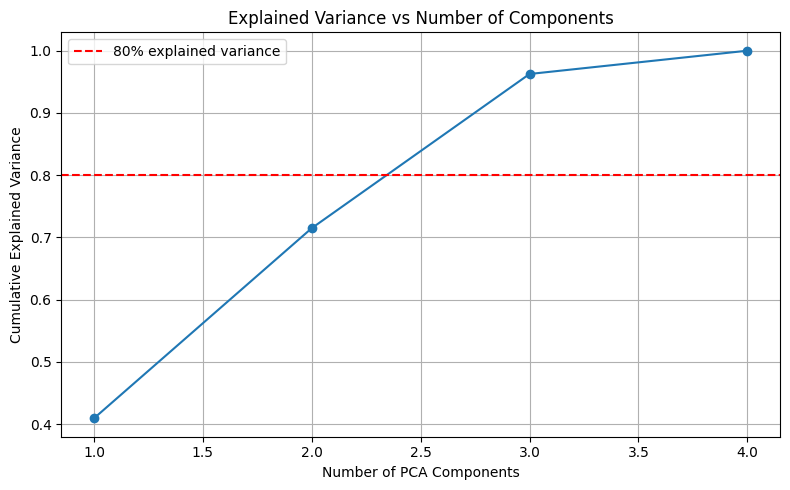

In [14]:
# ---- (e) How many components needed to explain 80% variance? ----
pca_full = decomposition.PCA()
pca_full.fit(X_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% explained variance')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
n_comp_80 = np.argmax(cumulative_variance >= 0.8) + 1
print(f"Number of PCA components to explain at least 80% variance: {n_comp_80}")

Number of PCA components to explain at least 80% variance: 3
